<a href="https://colab.research.google.com/github/Alihassan7726/Text-classification-using-ULMFiT/blob/main/Text_Classification_using_ULMFiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fastai


In [ ]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
import pandas as pd

In [ ]:
#import dataset
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# create a dataframe
df = pd.DataFrame({'label':dataset.target,
                   'text':dataset.data})
df.head()

,label,text
0,17,"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"
1,0,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim. And I'm sorry that you have these feelings of\ndenial about the faith you need to get by. Oh well, just pretend that it will\nall end happily ever after anyway. Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim. Don't forget your Flintstone's Chewables! :) \n--\nBake Timmons, III"
2,17,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to continue this think tank charade of yours, your\nfixation on Israel must stop. You might have to start asking the\nsame sort of questions of Arab countries as well. You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."
3,11,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed's posture,\nClipper seems to be ""more of the same"", rather than a new direction.\n Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn't have one anyway. Am I missing something?\n The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc. That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the 'underground' stature of ..."
4,10,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll enter anyway!!! Good!\n\n--\n Keith Keller\t\t\t\tLET'S GO RANGERS!!!!!\n\t\t\t\t\t\tLET'S GO QUAKERS!!!!!\n\tkkeller@mail.sas.upenn.edu\t\tIVY LEAGUE CHAMPS!!!!"


In [ ]:
dataset.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
df.shape

(11314, 2)

In [ ]:
# We will be taking only 2 classes ( for binary classification )
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop = True)
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer as wnl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stpwrds = set(stopwords.words('english'))
stpwrds.discard('not')
stpwrds.discard('no')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def clean_text(text):  
    lower = text.lower()
    words = re.sub(r"\n\t\s\r"," ",lower)
    words = re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", lower ) 
    #words = re.sub(r"\n\t\s\r"," ") 
    #pattren = r"[^\w\s\d]"
    #words = re.sub(pattren, "", lower)
    words2 = words.split()
    #print(words2)
    final_words =  [wnl().lemmatize(word , pos = 'v') for word in words2 if word not in stopwords.words('english')]
    final_words = ' '.join(final_words)
    return(final_words)
    
df['Cleaned-text'] = df['text'].apply(clean_text)
df.head()

,label,text,Cleaned-text
0,10,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll enter anyway!!! Good!\n\n--\n Keith Keller\t\t\t\tLET'S GO RANGERS!!!!!\n\t\t\t\t\t\tLET'S GO QUAKERS!!!!!\n\tkkeller@mail.sas.upenn.edu\t\tIVY LEAGUE CHAMPS!!!!",well change score playoff pool unfortunately time right certainly post new score rule tomorrow matter enter anyway good keith keller let go rangers let go quakers kkeller sas upenn edu ivy league champ
1,1,"Archive-name: graphics/resources-list/part1\nLast-modified: 1993/04/17\n\n\nComputer Graphics Resource Listing : WEEKLY POSTING [ PART 1/3 ]\n===================================================\nLast Change : 17 April 1993\n\nMany FAQs, including this Listing, are available on the archive site\npit-manager.mit.edu (alias rtfm.mit.edu) [18.172.1.27] in the directory\npub/usenet/news.answers. The name under which a FAQ is archived appears\nin the Archive-name line at the top of the article.\nThis FAQ is archived as graphics/resources-list/part[1-3]\n\nThere's a mail server on that machine. You send a e-mail message to\nmail-server@pit-manager.mit.edu containing the keyword ""help"" (without\nquotes!) in the message body.\n\nYou can see in many other places for this Listing. See the item:\n\n0. Places to find the Resource Listing\n\nfor more information.\n\nItems Changed:\n--------------\n\nRE-ARRANGED the subjects, in order to fir better in the 63K/article limit.\nI PLAN ON CHANGING ...",archive name graphics resources list part last modify computer graphics resource list weekly post part last change april many faqs include list available archive site pit manager mit edu alias rtfm mit edu directory pub usenet news answer name faq archive appear archive name line top article faq archive graphics resources list part mail server machine send e mail message mail server manager mit edu contain keyword help without quote message body see many place list see item place find resource list information items change arrange subject order fir better k article limit plan change headers soon careful resource list key sure remain subject line place find resource list graphics editors public domain free shareware systems plot package molecular visualization stuff think make post bi weekly think line get change character front add line prepended remove line remove use diff locate change text c copyright nikolaos c fotis copy freely file provide keep copyright notice intact compile...
2,10,"\nAnd of course, Mike Ramsey was (at one time) the captain in Buffalo prior to\nbeing traded to Pittsburgh. Currently, the Penguins have 3 former captains\nand 1 real captain (Lemieux) playing for them. They rotate the A's during the\nseason (and even the C while Mario was out). Even Troy Loney has worn the C\nfor the Pens.\n\n-Jay\n",course mike ramsey one time captain buffalo prior trade pittsburgh currently penguins former captain real captain lemieux play rotate season even c mario even troy loney wear c pen jay
3,10,"As I promised, I would give you the name of the Panther's president.\nAfter Huizenga announced the team name, he announced that Bill\nTorrey is named the first president of the Panthers.\n\nA little Bio from _Sun-Sentinel_\nTorrey, the architect of four consecutive Stanley Cup champions as \npersident and general manager of the New York Islanders.\nThroughout his 27 years in the NHL, Bill Torrey's bow ties have become\nas much of a signature as Andre Agassi's hair.\n\nThe Panthers will introduce a uniform, insignia, and ticket-price \ninformation in early next month. In the meantime, Huizenga leaves the\nday-to-day operation in the hands of Torrey and Bob Clarke, the VP and\nGM.\n\nThe Florida Panthers was chosen as the name of South Florida's NHL team\nto focus attention on an endangered species. There are 30 to 50 Florida\nPanthers in the Everglades Nationa

In [ ]:
df.drop(columns = 'text', inplace = True)
df.shape

(1184, 2)

In [ ]:
# Splitting Data

from sklearn.model_selection import train_test_split

# split data into training and validation set
df_train, df_val = train_test_split(df, stratify = df['label'], test_size = 0.1, random_state = 12)

print(df_train.shape)
print(df_val.shape)

(1065, 2)
(119, 2)


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_train, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_train, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Fine tunning Pre-Trained model 

In [ ]:
# We use 'data_lm' object to create a model , downloads pre-trained weights and now ready to be fine-tunning
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.7) # pre_trained_model = URLs.WT103_FWD or URLs.WT103_BWD ( use any of them ) 


In [ ]:
# train the learner object
# The one cycle and cyclic momentum allows the model to be trained on higher learning rates and converge faster.
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,7.861400,6.930718,0.095610,00:03


In [ ]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


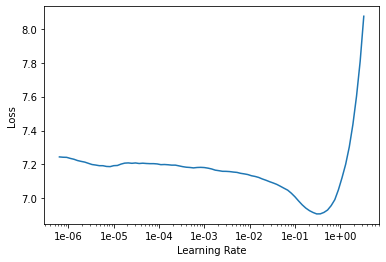

In [ ]:
learn.recorder.plot()

In [ ]:
# We will save this encoder for classification later
learn.save_encoder('ft_enc')


In [ ]:
# Let’s now use the data_clas object we created earlier to build a classifier with our fine-tuned encoder.
learn = text_classifier_learner(data_clas, drop_mult=0.7 , arch = AWD_LSTM)
learn.load_encoder('ft_enc')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (1065 items)
x: TextList
xxbos calder cup playoff schedule result home team cap necesary first round springfield indians vs providence bruins gm springfield providence gm springfield providence gm providence springfield cd islanders vs adirondack red wing gm last night cdi adirondack gm cdi adirondack gm adirondack cdi gm adirondack cdi gm cdi adirondack gm adirondack cdi gm cdi adirondack baltimore skipjacks binghamton rangers gm baltimore binghamton gm baltimore binghamton gm binghamton baltimore gm binghamton baltimore gm baltimore binghamton gm binghmaton baltimore gm baltimore binghamton utica devil vs rochester americans gm utica rochester gm utica rochester gm rochester utica gm rochester utica gm utica rochester gm rochester utica gm utica rochester moncton hawk vs st john maple leaf gm st john moncton gm moncton vs st john halifax gm st john moncton cape breton oilers vs fredericton canadiens gm fredericton cape breton ot gm

In [ ]:
learn.lr_find()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


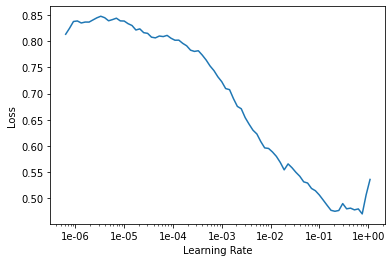

In [ ]:
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.360013,0.385261,0.857143,00:05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,55,13
1,4,47


In [ ]:
df_val['label'].value_counts()

10    60
1     59
Name: label, dtype: int64

## Some Extra Work

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)


In [ ]:
path

PosixPath('/root/.fastai/data/imdb_sample')